#Configurar

Directorio raiz. Debe tenr una subcarpeta que se llame _Datasets_.

In [1]:
dir_raiz = '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/19418 - Lopez/'

Códigos de coberturas de descartar.

In [2]:
cods_cob_descartar = [-128,0,99,128,65535]

Coberturas artificiales.

In [3]:
cod_ref_artif = 3 #30 #300

Radios de las vecindades definidos para la investigación. Siempre incluir el cero (0).

In [4]:
radios = [0,3,10]

Nombre de la capa de inclinación, sin extensión.

In [5]:
nom_slp = 'slope_degrees_final'

Proporción de ejemplos del dataset dedicados para realizar test. Núemro entre 0 y 1.

In [6]:
test_size = 0.2

Semilla para replicar los conjuntos de datos generados.

In [7]:
semilla = 12345

#0. Entorno

In [8]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

In [9]:
%%capture
!pip install rasterio

import rasterio as rs
from rasterio.plot import show

In [10]:
# explorar archivos
import glob
import os

In [11]:
import pandas as pd

In [12]:
# histograma
from matplotlib import pyplot as plt
# barplot
import seaborn as sns

Para hacer gráficas dinámicas.

In [13]:
import plotly.express as px

Para trabajar datos matriciales

In [14]:
import numpy as np
np.version.version # versioon utilizada y funcional dentro de este notebook

'1.22.4'

Para escribir el dataset en Drive y en un .csv

In [15]:
import csv

Para tomar el tiempo de entrenamiento.

In [16]:
from datetime import datetime

Para generar aleatoriamente el conjunto de datos de Entrenaimento y Prueba.

In [17]:
import random
random.seed(semilla)

#1. Importar

**Drivers**

Extrae la ruta de los tifs de las capas.

In [18]:
drivers_dirs = glob.glob(os.path.join(dir_raiz,"Drivers/*.tif"))

Se importan los rásters.

In [19]:
for dir in drivers_dirs:
  nom = os.path.splitext( os.path.split(dir)[1] )[0]
  globals()[ nom ] = rs.open( dir ).read()[0]

Se genera una lista con los nombres de los rásters.

In [20]:
drivers_nams = sorted([ os.path.splitext( os.path.split(dir)[1] )[0] for dir in drivers_dirs ])

---

**Constrains**

Extrae la ruta de los tifs de las capas.

In [21]:
constrs_dirs = glob.glob(os.path.join(dir_raiz,"Constrains/*.tif"))

Se importan los rásters.

In [22]:
for dir in constrs_dirs:
  nom = os.path.splitext( os.path.split(dir)[1] )[0]
  globals()[ nom ] = rs.open( dir ).read()[0]

Se genera una lista con los nombres de los rásters.

In [23]:
constrs_nams = sorted([ os.path.splitext( os.path.split(dir)[1] )[0] for dir in constrs_dirs ])

Se marca con cero todo lo que no sea uno.

In [24]:
for nom in constrs_nams:
  globals()[ nom ][locals()[ nom ] != 1] = 0

---

**Coberturas**

Extrae la ruta de los tifs de las capas.

In [25]:
cob_dirs = glob.glob(os.path.join(dir_raiz,"Coberturas/*.tif"))

Se importan los rásters.

In [26]:
for dir in cob_dirs:
  nom = os.path.splitext( os.path.split(dir)[1] )[0]
  globals()[ nom ] = rs.open( dir ).read()[0]

Se genera una lista con los nombres de los rásters.

In [27]:
cob_nams = sorted([ os.path.splitext( os.path.split(dir)[1] )[0] for dir in cob_dirs ])

Pasar coberturas a nivel 1.

In [28]:
#def n1(num):
#  if num not in cods_cob_descartar:
#    return int(str(num)[0])
#  else:
#    return num

#n1_cob = np.vectorize(n1)

#for nom in cob_nams:
#  globals()[ nom ] = n1_cob(locals()[ nom ])

#2. Explorar

**Drivers**

Se exploran los rásters de los Drivers.

In [29]:
drivers_nams

['centro_poblados_cabeceras_proximity',
 'dem_lopez',
 'drenaje_senc_proximity',
 'slope_degrees_final',
 'vias_proximity']

In [30]:
slope_degrees_final[slope_degrees_final < 0] = 0

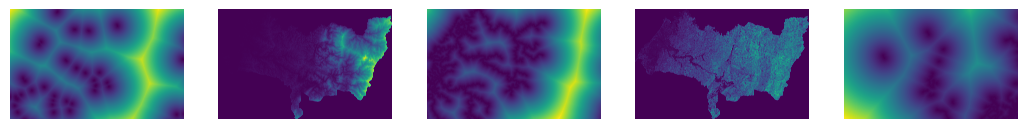

In [31]:
plt.figure(figsize=(13,13))
for n, nom in zip(range(len(drivers_nams)), drivers_nams):
  plt.subplot(1,len(drivers_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

In [32]:
for nom in drivers_nams:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

centro_poblados_cabeceras_proximity:
(5196, 8209)
 
dem_lopez:
(5196, 8209)
 
drenaje_senc_proximity:
(5196, 8209)
 
slope_degrees_final:
(5196, 8209)
 
vias_proximity:
(5196, 8209)
 


In [33]:
#f, (a1,a2,a3,a4,a5) = plt.subplots(1, 5, figsize=(13,13))

#a1.imshow(dem_argelia)
#a1.axis('off')
#a2.imshow(slope_degrees_final)
#a2.axis('off')
#a3.imshow(centro_poblados_cabeceras_proximity)
#a3.axis('off')
#a4.imshow(drenaje_senc_proximity)
#a4.axis('off')
#a5.imshow(vias_proximity)
#a5.axis('off')

#f.show()

In [34]:
#plt.figure(figsize=(13,2))
#for n, nom in zip(range(len(drivers_nams)), drivers_nams):
  #plt.subplot(1,len(drivers_nams),n+1)
  #ax = px.histogram( choice(locals()[nom].ravel(),size=6500000,replace=False) , nbins=20 )
  #ax
#plt.show()

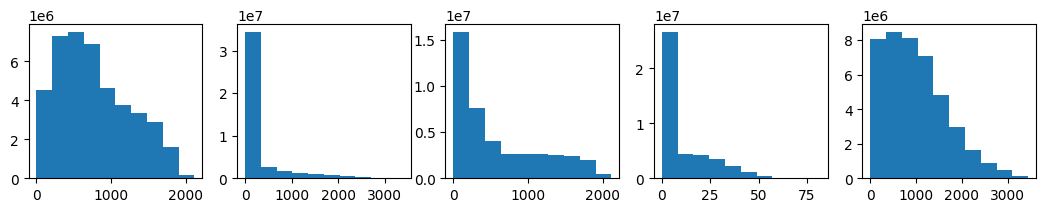

In [35]:
plt.figure(figsize=(13,2))
for n, nom in zip(range(len(drivers_nams)), drivers_nams):
  plt.subplot(1,len(drivers_nams),n+1)
  ax = plt.hist(locals()[ nom ].ravel())
  ax
plt.show()

---

**Constrains**

In [36]:
constrs_nams

['mpio_mask_binario', 'raster_ambiental_binario', 'raster_comunitario_binario']

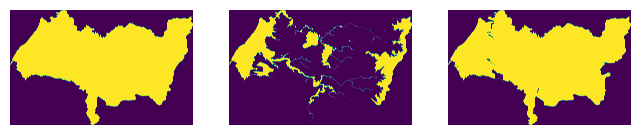

In [37]:
plt.figure(figsize=(8,8))
for n, nom in zip(range(len(constrs_nams)), constrs_nams):
  plt.subplot(1,len(constrs_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

In [38]:
for nom in constrs_nams:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

mpio_mask_binario:
(5196, 8209)
 
raster_ambiental_binario:
(5196, 8209)
 
raster_comunitario_binario:
(5196, 8209)
 


In [39]:
for nom in constrs_nams:
  print( nom + ':' )
  print( pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).valores.value_counts() )
  print( ' ' )

mpio_mask_binario:
1    21626984
0    21026980
Name: valores, dtype: int64
 
raster_ambiental_binario:
0    36282948
1     6371016
Name: valores, dtype: int64
 
raster_comunitario_binario:
0    21742172
1    20911792
Name: valores, dtype: int64
 


In [40]:
cob_nams

['cob_2000_2002', 'cob_2005_2009', 'cob_2010_2012', 'cob_2018_2018']

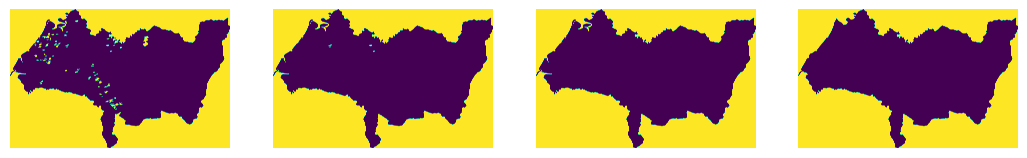

In [41]:
plt.figure(figsize=(13,13))
for n, nom in zip(range(len(cob_nams)), cob_nams):
  plt.subplot(1,len(cob_nams),n+1)
  ax = plt.imshow( np.isin(locals()[ nom ], cods_cob_descartar ) )
  plt.axis('off')
  ax
plt.show()

In [42]:
#raster_nubes_binario = np.zeros( locals()[cob_nams[0]].shape ).astype('int')
#for nom in cob_nams:
#  raster_nubes_binario = raster_nubes_binario | np.isin(locals()[nom], cods_cob_descartar ).astype('int')

#constrs_nams.append('raster_nubes_binario')
#ax = plt.imshow( raster_nubes_binario )
#plt.axis('off')
#ax
#plt.show()

---

**Coberturas**

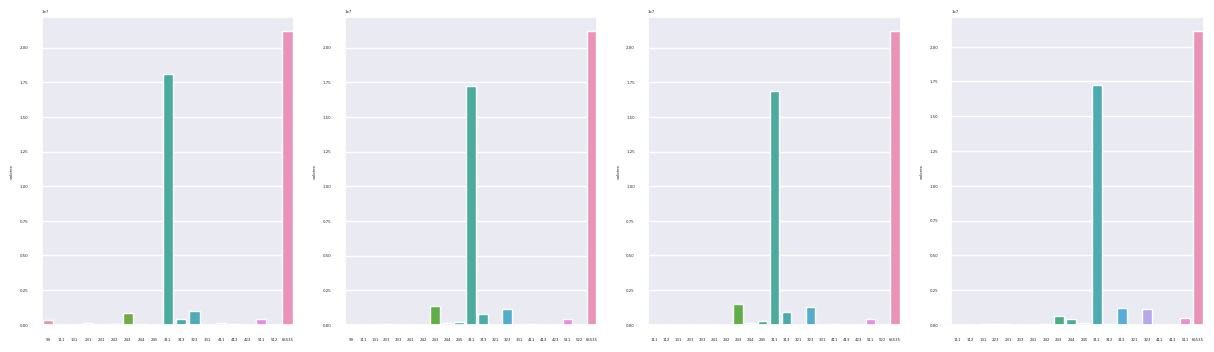

In [43]:
sns.set(font_scale=0.25)
plt.figure(figsize=(15,4))
for n, nom in zip(range(len(cob_nams)), cob_nams):
  plt.subplot(1,len(cob_nams),n+1)
  d = pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).valores.value_counts()
  sns.barplot(x=d.index, y=d)
plt.show()

In [44]:
for nom in cob_nams:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

cob_2000_2002:
(5196, 8209)
 
cob_2005_2009:
(5196, 8209)
 
cob_2010_2012:
(5196, 8209)
 
cob_2018_2018:
(5196, 8209)
 


In [45]:
cob_nams

['cob_2000_2002', 'cob_2005_2009', 'cob_2010_2012', 'cob_2018_2018']

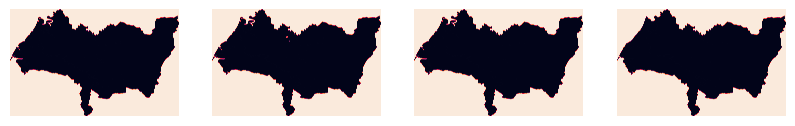

In [46]:
plt.figure(figsize=(10,10))
for n, nom in zip(range(len(cob_nams)), cob_nams):
  plt.subplot(1,len(cob_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

In [47]:
s = pd.DataFrame(locals()[ cob_nams[0] ].ravel(), columns= ['valores']).value_counts().sort_index().to_frame()

for nom in cob_nams[1:]:
  s = pd.merge( s , pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).value_counts().sort_index().to_frame() , how='outer', left_index=True , right_index=True )

s.columns = cob_nams

s

<ipython-input-47-5b11f7a278d1>:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'0_x'} in the result is deprecated and will raise a MergeError in a future version.
  s = pd.merge( s , pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).value_counts().sort_index().to_frame() , how='outer', left_index=True , right_index=True )


,cob_2000_2002,cob_2005_2009,cob_2010_2012,cob_2018_2018
valores,,,,
99,375785.0,6245.0,NaN,NaN
111,1639.0,1822.0,1822.0,2641.0
112,NaN,NaN,1971.0,1727.0
131,3591.0,3591.0,5326.0,23047.0
223,NaN,NaN,NaN,31572.0
231,152519.0,28499.0,13231.0,27881.0
233,NaN,7234.0,7510.0,18306.0
241,7972.0,4812.0,6837.0,3191.0
242,38740.0,8246.0,13054.0,69146.0


---

#3. Escenarios y periodos

Escenarios

In [ ]:
constrs_nams.remove('mpio_mask_binario')
#constrs_nams.remove('raster_comunitario_binario') #LOPEZ CAUCA

constrains_binario = np.invert( locals()[constrs_nams[0]] )
for n in range(len(constrs_nams)):
  constrains_binario = constrains_binario & np.invert( locals()[constrs_nams[n]] )
constrains_binario = constrains_binario & locals()['mpio_mask_binario']

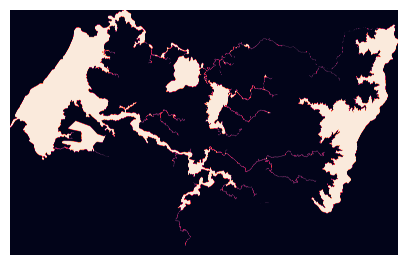

In [ ]:
plt.figure(figsize=(5,5))
for n, nom in zip(range(len(constrs_nams)), constrs_nams):
  plt.subplot(1,len(constrs_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

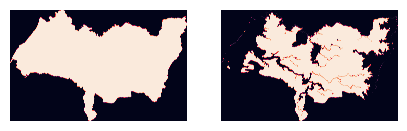

In [ ]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
ax = plt.imshow(mpio_mask_binario)
plt.axis('off')
ax
plt.subplot(1,2,2)
ax = plt.imshow(constrains_binario)
plt.axis('off')
ax
plt.show()

Nombres de las capas de los rásters booleanos de los escenarios del estudio:
1.   Municipio completo
2.   Municipio con delimitación para el uso del suelo

In [ ]:
esc_nams = ['mpio_mask_binario','constrains_binario']

#4. Índices para construcción de datasets

Lista de los números de periodo actual.

In [ ]:
inter_periodos = range(len(cob_nams)-1)
num_per = len(cob_nams)
print(cob_nams,)
print(inter_periodos,)
print(num_per)

['cob_1_2000_2002', 'cob_2_2005_2009', 'cob_3_2010_2012', 'cob_4_2018_2018']
range(0, 3)
4


Número de filas y columnas del área de estudio.

In [ ]:
filas = range(mpio_mask_binario.shape[0])
columnas = range(mpio_mask_binario.shape[1])

Lista con códigos de coberturas en todos los periodos.

In [ ]:
cob_cods_compl = []
for nom in cob_nams:
  cob_cods_compl.extend(list(set(locals()[nom].ravel().tolist())))
cob_cods_compl = sorted(list(set(cob_cods_compl)))
cob_cods = cob_cods_compl.copy()
for nom in cods_cob_descartar:
  if nom in cob_cods:
    cob_cods.remove(nom)
print(cob_cods_compl,)
print(cob_cods,)

[-128, 1, 2, 3, 5, 99, 128]
[1, 2, 3, 5]


Nombres de las características extraidas y su cantidad.

In [ ]:
feature_nams = ['dr_'+d[:5] for d in drivers_nams] + ['slp_mean_'+str(r) for r in radios if r!=0] + ['SI_cVt_'+str(r)+'_'+str(c) for r in radios for c in cob_cods ]
print(feature_nams,)

['dr_centr', 'dr_dem_a', 'dr_drena', 'dr_slope', 'dr_vias_', 'slp_mean_3', 'slp_mean_10', 'SI_cVt_0_1', 'SI_cVt_0_2', 'SI_cVt_0_3', 'SI_cVt_0_5', 'SI_cVt_3_1', 'SI_cVt_3_2', 'SI_cVt_3_3', 'SI_cVt_3_5', 'SI_cVt_10_1', 'SI_cVt_10_2', 'SI_cVt_10_3', 'SI_cVt_10_5']


In [ ]:
len(feature_nams)

19

#6. Datasets

Se inicializan las matrices de trancisión.

In [ ]:
tm_compl = np.zeros((len(cob_cods),len(cob_cods)))
tm_compl = tm_compl.astype('int')
tm_condi = np.zeros((len(cob_cods),len(cob_cods)))
tm_condi = tm_condi.astype('int')

for t in inter_periodos:

  globals()["tm_compl_"+str(t)] = np.zeros((len(cob_cods),len(cob_cods)))
  globals()["tm_compl_"+str(t)] = locals()["tm_compl_"+str(t)].astype('int')
  globals()["tm_condi_"+str(t)] = np.zeros((len(cob_cods),len(cob_cods)))
  globals()["tm_condi_"+str(t)] = locals()["tm_condi_"+str(t)].astype('int')

Crea los directorios en los que se van a distribuir los datasets.

In [ ]:
!mkdir completo
!mkdir completo/train
!mkdir completo/test
!mkdir completo/ajustefinal

!mkdir condicionado
!mkdir condicionado/train
!mkdir condicionado/test
!mkdir condicionado/ajustefinal

Se extrae una tabla con los nombres de los features extraidos, es decir, los encabezados de la tabla de _X_.

In [ ]:
with open( '/content/features.csv','a',newline='' ) as f:
  w1 = csv.writer(f)
  w1.writerow( feature_nams )

Se va a iterar a través de tres índices:

1. Periodos de estudio según los rásters disponibles de coberturas
2. Coordenadas del área de estudio
3. Escenarios

Se extraen dos (2) diferentes tablas de datos por unidad de análisis: _y_ y _X_, por cada uno de las (2) particiones mas (1) sin partición: _Train_ y _Test_ y _ajuste final_, así como por cada uno de las dos (2) escenarios: _completo_ y _condicionado_. En total se escriben doce (12) tablas.

In [ ]:
cont = 0

# conexioon a los planos escritos en la sesioon de colab
with open( '/content/completo/train/y.csv','a',newline='' ) as co1_y:
  comptr_y = csv.writer(co1_y)
  with open( '/content/completo/train/X.csv','a',newline='' ) as co1_X:
    comptr_X = csv.writer(co1_X)
    with open( '/content/condicionado/train/y.csv','a',newline='' ) as cn1_y:
      constr_y = csv.writer(cn1_y)
      with open( '/content/condicionado/train/X.csv','a',newline='' ) as cn1_X:
        constr_X = csv.writer(cn1_X)

        with open( '/content/completo/test/y.csv','a',newline='' ) as co0_y:
          compts_y = csv.writer(co0_y)
          with open( '/content/completo/test/X.csv','a',newline='' ) as co0_X:
            compts_X = csv.writer(co0_X)
            with open( '/content/condicionado/test/y.csv','a',newline='' ) as cn0_y:
              consts_y = csv.writer(cn0_y)
              with open( '/content/condicionado/test/X.csv','a',newline='' ) as cn0_X:
                consts_X = csv.writer(cn0_X)

                with open( '/content/completo/ajustefinal/y.csv','a',newline='' ) as aj1_y:
                  compaj_y = csv.writer(aj1_y)
                  with open( '/content/completo/ajustefinal/X.csv','a',newline='' ) as aj1_X:
                    compaj_X = csv.writer(aj1_X)
                    with open( '/content/condicionado/ajustefinal/y.csv','a',newline='' ) as aj0_y:
                      consaj_y = csv.writer(aj0_y)
                      with open( '/content/condicionado/ajustefinal/X.csv','a',newline='' ) as aj0_X:
                        consaj_X = csv.writer(aj0_X)

                        # se itera en el tiempo y el espacio
                        for t in inter_periodos:
                          for i in filas:
                            for j in columnas:

                              # se imprime el avance de la tarea
                              if cont % 1000000 == 0:
                                print(
                                  datetime.now().strftime("%d/%m/%Y %H:%M:%S") , "-" ,
                                  str(round(100*cont/(len(inter_periodos)*len(filas)*len(columnas)),0)) , "%"
                                )
                              cont += 1

                              # se verifica que la ubicación haga parte del escenario completo
                              # se verifica que no haya valores descartables en el periodo t
                              if locals()[esc_nams[0]][i,j] == 1 and locals()[cob_nams[t]][i,j] not in cods_cob_descartar:

                                # se verifica que no se tome el uultimo periodo para el ajuste del modelo
                                if t < num_per-1:

                                  # se extrae la cobertura en el espacio y tiempo
                                  y = locals()[cob_nams[t+1]][i,j]

                                  # se verifica que la cobertura extraida no es nube
                                  if y not in cods_cob_descartar:

                                    # se extraen los features
                                    feat_vals = []
                                    for d in drivers_nams:
                                      feat_vals.append( locals()[d][i,j] )
                                    for r in radios:
                                      if r != 0:
                                        cx0 = int(np.where((i-r)<0,0,(i-r)))
                                        cx1 = i+r+1
                                        cy0 = int(np.where((j-r)<0,0,(j-r)))
                                        cy1 = j+r+1
                                        feat_vals.append( np.mean( locals()[nom_slp][cx0:cx1,cy0:cy1] ) )
                                    for r in radios:
                                      if r == 0:
                                        for c in cob_cods:
                                          feat_vals.append( int( locals()[cob_nams[t]][i,j] == c ) )
                                      else:
                                        for c in cob_cods:
                                          cx0 = int(np.where((i-r)<0,0,(i-r)))
                                          cx1 = i+r+1
                                          cy0 = int(np.where((j-r)<0,0,(j-r)))
                                          cy1 = j+r+1
                                          feat_vals.append( np.sum( locals()[cob_nams[t]][cx0:cx1,cy0:cy1] == c ) )

                                    # se escribe todo en el dataset de ajuste final, escenario completo
                                    compaj_y.writerow( [ y ] )
                                    compaj_X.writerow( feat_vals )

                                    # se asigna el ejemplo a entrenamiento o prueba de forma aleatoria
                                    # en el escenario completo
                                    if random.choices([True,False], weights=(1-test_size,test_size))[0]:
                                      comptr_y.writerow( [ y ] )
                                      comptr_X.writerow( feat_vals )
                                    else:
                                      compts_y.writerow( [ y ] )
                                      compts_X.writerow( feat_vals )

                                    # se verifica que la ubicacioon hace parte del escenario condicionado
                                    if locals()[esc_nams[1]][i,j]==1:

                                      # se escribe todo en el dataset de ajuste final, escenario cndicionado
                                      consaj_y.writerow( [ y ] )
                                      consaj_X.writerow( feat_vals )

                                      # se asigna el ejemplo a entrenamiento o prueba de forma aleatoria
                                      # en el escenario condicionado
                                      if random.choices([True,False], weights=(1-test_size,test_size))[0]:
                                        constr_y.writerow( [ y ] )
                                        constr_X.writerow( feat_vals )
                                      else:
                                        consts_y.writerow( [ y ] )
                                        consts_X.writerow( feat_vals )

                              # matrices de transición
                              # se verifica que cobertura actual y siguiente esten dentro de los coodigos de cobertura vaalidos
                              if locals()[cob_nams[t]][i,j] not in cods_cob_descartar and locals()[cob_nams[t+1]][i,j] not in cods_cob_descartar:

                                # se captura el cambio en el escenario completo
                                c_ini = cob_cods.index( locals()[cob_nams[t]][i,j] )
                                c_fin = cob_cods.index( locals()[cob_nams[t+1]][i,j] )

                                tm_compl[c_ini,c_fin] += 1*mpio_mask_binario[i,j]
                                globals()["tm_compl_"+str(t)][c_ini,c_fin] += 1*mpio_mask_binario[i,j]

                                # en el escenario condicionado se verifica que
                                # para lugares por fuera del condicionado
                                # no pueden pasar de cobertura natural a artificial
                                # y en tal caso se deja la cobertura actual como cobertura siguiente
                                if locals()[cob_nams[t]][i,j] >= cod_ref_artif and locals()[cob_nams[t+1]][i,j] < cod_ref_artif and constrains_binario[i,j] == 0:
                                  tm_condi[c_ini,c_ini] += 1*mpio_mask_binario[i,j]
                                  globals()["tm_condi_"+str(t)][c_ini,c_ini] += 1*mpio_mask_binario[i,j]

                                else:
                                  tm_condi[c_ini,c_fin] += 1*mpio_mask_binario[i,j]
                                  globals()["tm_condi_"+str(t)][c_ini,c_fin] += 1*mpio_mask_binario[i,j]

print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") , "- 100.0 %" )

11/07/2023 03:18:09 - 0.0 %
11/07/2023 03:19:46 - 4.0 %
11/07/2023 03:23:25 - 8.0 %
11/07/2023 03:28:43 - 12.0 %
11/07/2023 03:34:19 - 16.0 %
11/07/2023 03:39:24 - 20.0 %
11/07/2023 03:43:56 - 24.0 %
11/07/2023 03:47:28 - 27.0 %
11/07/2023 03:50:08 - 31.0 %
11/07/2023 03:51:08 - 35.0 %
11/07/2023 03:53:32 - 39.0 %
11/07/2023 03:58:15 - 43.0 %
11/07/2023 04:03:55 - 47.0 %
11/07/2023 04:09:14 - 51.0 %
11/07/2023 04:14:09 - 55.0 %
11/07/2023 04:18:03 - 59.0 %
11/07/2023 04:21:08 - 63.0 %
11/07/2023 04:23:01 - 67.0 %
11/07/2023 04:24:24 - 71.0 %
11/07/2023 04:28:04 - 75.0 %
11/07/2023 04:33:28 - 79.0 %
11/07/2023 04:39:04 - 82.0 %
11/07/2023 04:44:29 - 86.0 %
11/07/2023 04:49:05 - 90.0 %
11/07/2023 04:52:34 - 94.0 %
11/07/2023 04:55:16 - 98.0 %
11/07/2023 04:55:51 - 100.0 %


Se salvan los datasets.

In [ ]:
%%capture
!cp /content/features.csv '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/19050 - Argelia/Datasets/'
!cp -R /content/completo '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/19050 - Argelia/Datasets/'
!cp -R /content/condicionado '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/19050 - Argelia/Datasets/'

Se salvan las matrices de transición.

In [ ]:
with pd.ExcelWriter( path=dir_raiz+'/Datasets/tm.xlsx') as writer:

  dfex = pd.DataFrame(tm_compl)
  dfex.columns = cob_cods
  dfex.index = cob_cods
  dfex.to_excel(writer, sheet_name="compl")

  dfex = pd.DataFrame(tm_condi)
  dfex.columns = cob_cods
  dfex.index = cob_cods
  dfex.to_excel(writer, sheet_name="condi")

  for t in inter_periodos:
    dfex = pd.DataFrame(locals()["tm_compl_"+str(t)])
    dfex.columns = cob_cods
    dfex.index = cob_cods
    dfex.to_excel(writer, sheet_name="compl_"+str(t))

    dfex = pd.DataFrame(locals()["tm_condi_"+str(t)])
    dfex.columns = cob_cods
    dfex.index = cob_cods
    dfex.to_excel(writer, sheet_name="condi_"+str(t))

  del dfex